
# **Project: Impact of Filter Size on CNN Accuracy**
Objective: To determine how varying filter sizes in a CNN affects the model's ability to accurately identify lines of varying orientations and lengths in images.
### Project Outline:


1.   Data Preparation:


*   Create or obtain a dataset of images with lines of various orientations and lengths.
*   Label the images based on the characteristics of the lines (e.g., vertical, horizontal, diagonal, length, etc.).
*   Split the dataset into training, validation, and test sets.




2.   Model Building:
* Design a base CNN model. Start with a relatively simple architecture that can be expanded upon.
* Make sure the input layer is appropriate for the size of your images.
* Define a few different models with varying filter sizes (e.g., 3x3, 5x5, 7x7) while keeping other architecture parameters constant.

3. Training:

* Train each model on the training set, using the same hyperparameters (epochs, batch size, optimizer, etc.) for a fair comparison.
* Use the validation set to monitor the training process for signs of overfitting or underfitting.

4. Evaluation:

* Evaluate each model's performance on the test set.
Compare the accuracy of the models with different filter sizes.
* Record observations on how the filter size affects the model's ability to recognize different line patterns.

5. Analysis:

* Analyze the results to understand the relationship between filter size and feature extraction.
* Determine if smaller filters are better at detecting fine details while larger filters capture more global features.
* Consider creating visualizations of the filters and the feature maps to better understand what features are being extracted by different layers.
6. Reporting:

* Document your methodology, experiments, results, and conclusions.
* Discuss potential reasons for the performance trends observed and any practical implications.
7. Future Investigations:
* Experiment with additional variations in the architecture, such as the number of filters, depth of the network, and the inclusion of other types of layers.
* Try using regularization techniques like dropout or data augmentation to see if they mitigate any overfitting or underfitting observed.

*Setting up Environment*

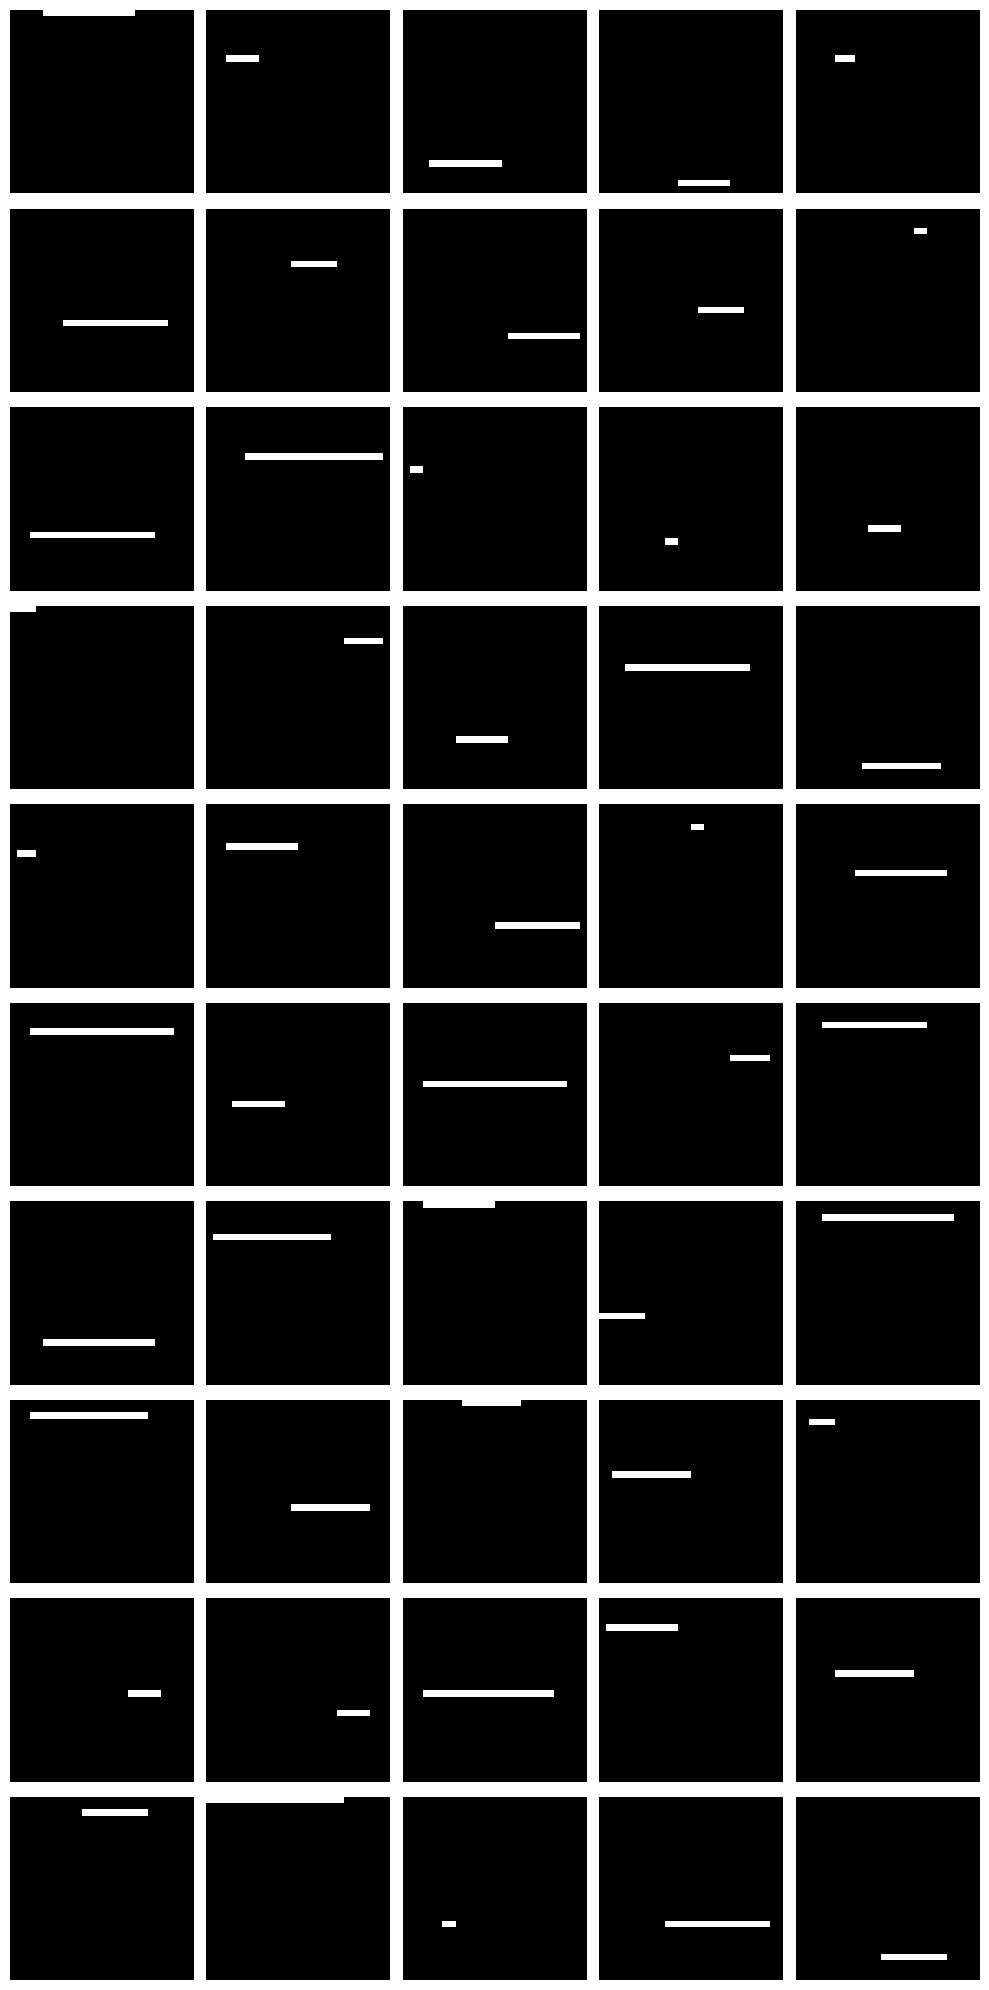

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for synthetic dataset
num_images = 50
image_size = (28, 28)  # Using a standard small image size

# Function to generate an image with a single horizontal line
def generate_image_with_horizontal_line(image_size, line_length, margin_left, margin_top):
    image = np.zeros(image_size)
    y = margin_top
    x_start = margin_left
    x_end = x_start + line_length
    image[y, x_start:x_end] = 1  # Set the pixels of the line to 1
    return image

# Create dataset
np.random.seed(0)  # For reproducibility
dataset = []
line_lengths = []
for _ in range(num_images):
    line_length = np.random.randint(2, image_size[1] - 5)  # Random line length
    margin_left = np.random.randint(0, image_size[1] - line_length)  # Random left margin
    margin_top = np.random.randint(0, image_size[0])  # Random top margin
    image = generate_image_with_horizontal_line(image_size, line_length, margin_left, margin_top)
    dataset.append(image)
    line_lengths.append(line_length)

# Display all 50 images from the dataset
fig, axes = plt.subplots(10, 5, figsize=(10, 20))  # 10 rows and 5 columns to display 50 images
axes = axes.flatten()
for img, ax in zip(dataset, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Convert dataset to numpy array for easier processing
dataset_array = np.array(dataset)
line_lengths = np.array(line_lengths)
line_lengths.shape
# Splitting the dataset into training and testing sets (75:25 ratio)
train_images, test_images = train_test_split(dataset_array, test_size=0.25, random_state=0)
train_line_lengths, test_line_lengths = train_test_split(line_lengths, test_size=0.25, random_state=0)


# # Checking the shape of the training and testing sets
train_images.shape, test_images.shape

((37, 28, 28), (13, 28, 28))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have the dataset as 'dataset_array' and the line lengths as 'line_lengths'

# # Split the dataset into training and testing sets (75:25 ratio)
# train_images, test_images, train_line_lengths, test_line_lengths = train_test_split(dataset_array, line_length, test_size=0.25, random_state=0
# )

# Function to create a CNN model with a single convolutional layer of a given kernel size
def cnn_model(kernel_size):
    model = Sequential([
        Conv2D(filters=16, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 1)),
        Flatten(),
        Dense(1)  # Single output node for regression
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create models with different kernel sizes
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
models = {str(k): cnn_model(k) for k in kernel_sizes}



Epoch 1/10
2/2 [==============================] - 1s 16ms/step - loss: 138.8472
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 136.6530
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 134.1339
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 130.8512
Epoch 5/10
2/2 [==============================] - 0s 11ms/step - loss: 126.8156
Epoch 6/10
2/2 [==============================] - 0s 20ms/step - loss: 122.0378
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 115.6617
Epoch 8/10
2/2 [==============================] - 0s 14ms/step - loss: 108.0163
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 99.1809
Epoch 10/10
2/2 [==============================] - 0s 13ms/step - loss: 79.3170
Epoch 1/10
2/2 [==============================] - 1s 21ms/step - loss: 138.5026
Epoch 2/10
2/2 [==============================] - 0s 33ms/step - loss: 136.2311
Epoch 3/10
2/2 [==========================

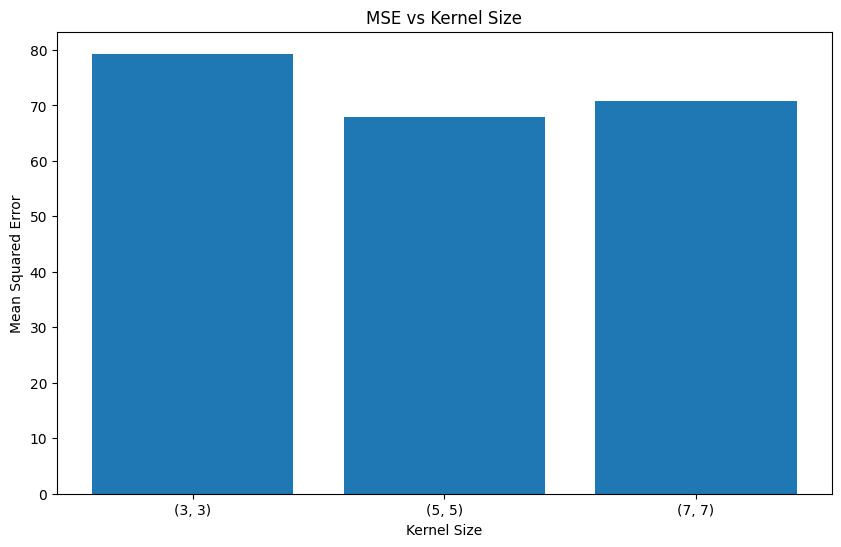

In [ ]:
# Preprocess data
train_images_expanded = np.expand_dims(train_images, -1)  # Expanding the dimensions to add channel info
# Train models and evaluate
accuracies = {}
for kernel_size, model in models.items():
    model.fit(train_images_expanded, train_line_lengths, epochs=10, batch_size=32)
    mse = model.evaluate(train_images_expanded, train_line_lengths)
    accuracies[kernel_size] = mse

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.xlabel('Kernel Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Kernel Size')
plt.show()

1/1 [==============================] - 0s 153ms/step - loss: 98.6449


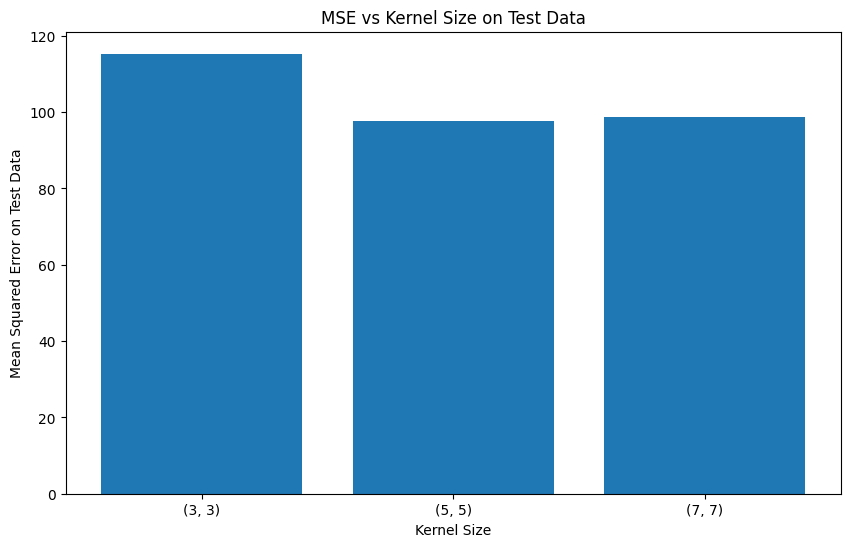

In [ ]:
# Preprocess the test data
test_images_expanded = np.expand_dims(test_images, -1)  # Expanding the dimensions to add channel info

# Evaluate models on test data
test_accuracies = {}
for kernel_size, model in models.items():
    mse_test = model.evaluate(test_images_expanded, test_line_lengths)
    test_accuracies[kernel_size] = mse_test

# Plotting the accuracies for test data
plt.figure(figsize=(10, 6))
plt.bar(range(len(test_accuracies)), list(test_accuracies.values()), align='center')
plt.xticks(range(len(test_accuracies)), list(test_accuracies.keys()))
plt.xlabel('Kernel Size')
plt.ylabel('Mean Squared Error on Test Data')
plt.title('MSE vs Kernel Size on Test Data')
plt.show()